## Описание данных

#### Датасет содержит следующие переменные:

###### ID: Уникальный идентификатор автомобиля.
###### Price: Цена автомобиля (целевая переменная).
###### Levy: Налог на автомобиль.
###### Manufacturer: Производитель автомобиля.
###### Model: Модель автомобиля.
###### Prod. year: Год выпуска автомобиля.
###### Category: Категория автомобиля.
###### Leather interior: Наличие кожаного салона (Yes/No).
###### Fuel type: Тип топлива.
###### Engine volume: Объем двигателя.
###### Mileage: Пробег автомобиля.
###### Cylinders: Количество цилиндров.
###### Gearbox type: Тип коробки передач.
###### Drive wheels: Привод автомобиля.
###### Doors: Количество дверей.
###### Wheel: Расположение руля.
###### Color: Цвет автомобиля.
###### Airbags: Количество подушек безопасности.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import os

In [4]:
# Загрузка данных
data = pd.read_csv('dataset/car_price_prediction.csv')
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,45767457,1254,639,AUDI,A4,2014,Sedan,Yes,Petrol,2,42395 km,4.0,Automatic,4x4,04-May,Left wheel,Grey,0
14996,45653204,314,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,382746 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
14997,45761510,10349,658,OPEL,Corsa,2009,Hatchback,No,Diesel,1.3 Turbo,181179 km,4.0,Manual,Front,04-May,Left wheel,Black,10
14998,45810211,23703,765,CHEVROLET,Malibu,2015,Sedan,Yes,Diesel,2,100069 km,4.0,Automatic,Front,04-May,Left wheel,White,4


In [5]:
# Размер CSV-файла
data.shape

(15000, 18)

In [6]:
# Описание
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,4.557241e+07,17268.921933,2010.897400,4.583000,6.577333
std,9.745995e+05,20369.225646,5.682508,1.205601,4.313969
min,2.074688e+07,1.000000,1939.000000,1.000000,0.000000
25%,4.570113e+07,5331.000000,2009.000000,4.000000,4.000000
50%,4.577207e+07,13172.000000,2012.000000,4.000000,6.000000
75%,4.580197e+07,22266.000000,2014.250000,4.000000,12.000000
max,4.581665e+07,872946.000000,2020.000000,16.000000,16.000000


In [7]:
# Подсчет количества пропущенных значений в каждом столбце
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [8]:
# Удаление дубликатов
data.duplicated().sum()

208

In [9]:
# Удаление дубликатов из данных
data = data.drop_duplicates()
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,45767457,1254,639,AUDI,A4,2014,Sedan,Yes,Petrol,2,42395 km,4.0,Automatic,4x4,04-May,Left wheel,Grey,0
14996,45653204,314,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,382746 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
14997,45761510,10349,658,OPEL,Corsa,2009,Hatchback,No,Diesel,1.3 Turbo,181179 km,4.0,Manual,Front,04-May,Left wheel,Black,10
14998,45810211,23703,765,CHEVROLET,Malibu,2015,Sedan,Yes,Diesel,2,100069 km,4.0,Automatic,Front,04-May,Left wheel,White,4


In [10]:
# Информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14792 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                14792 non-null  int64  
 1   Price             14792 non-null  int64  
 2   Levy              14792 non-null  object 
 3   Manufacturer      14792 non-null  object 
 4   Model             14792 non-null  object 
 5   Prod. year        14792 non-null  int64  
 6   Category          14792 non-null  object 
 7   Leather interior  14792 non-null  object 
 8   Fuel type         14792 non-null  object 
 9   Engine volume     14792 non-null  object 
 10  Mileage           14792 non-null  object 
 11  Cylinders         14792 non-null  float64
 12  Gear box type     14792 non-null  object 
 13  Drive wheels      14792 non-null  object 
 14  Doors             14792 non-null  object 
 15  Wheel             14792 non-null  object 
 16  Color             14792 non-null  object 
 17

In [11]:
# Список столбцов
print(data.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


In [12]:
# Уникальные значения в столбце 'Manufacturer'
print(data['Manufacturer'].unique())

['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN']


In [13]:
data[data['Manufacturer'].notnull()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,45767457,1254,639,AUDI,A4,2014,Sedan,Yes,Petrol,2,42395 km,4.0,Automatic,4x4,04-May,Left wheel,Grey,0
14996,45653204,314,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,382746 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
14997,45761510,10349,658,OPEL,Corsa,2009,Hatchback,No,Diesel,1.3 Turbo,181179 km,4.0,Manual,Front,04-May,Left wheel,Black,10
14998,45810211,23703,765,CHEVROLET,Malibu,2015,Sedan,Yes,Diesel,2,100069 km,4.0,Automatic,Front,04-May,Left wheel,White,4


##### График медианной цены по производителям (топ 5)

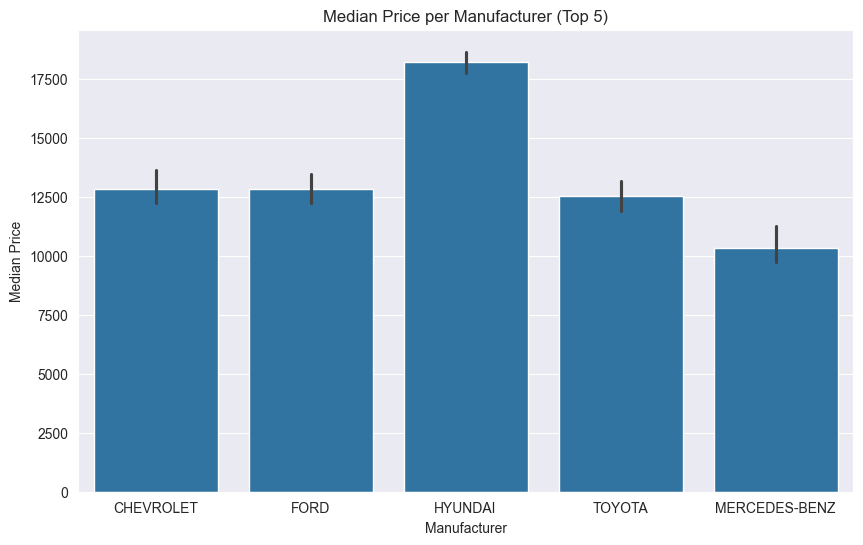

In [14]:
top_manufacturers = data['Manufacturer'].value_counts().nlargest(5).index
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
plt.figure(figsize=(10, 6))
sns.barplot(x='Manufacturer', y='Price', data=data[data['Manufacturer'].isin(top_manufacturers)], estimator='median')
plt.title('Median Price per Manufacturer (Top 5)')
plt.xlabel('Manufacturer')
plt.ylabel('Median Price')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15392\3609070095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drive wheels', data=data, palette='viridis')


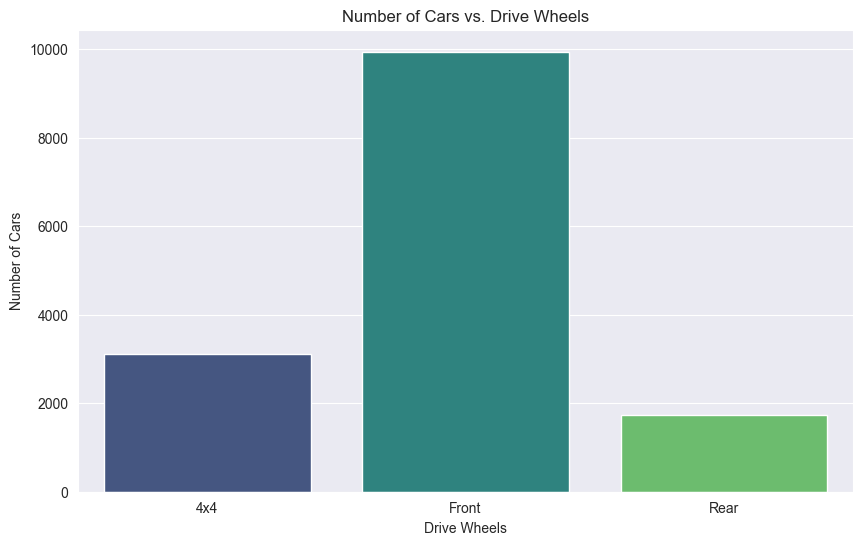

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Drive wheels', data=data, palette='viridis')
plt.title('Number of Cars vs. Drive Wheels')
plt.xlabel('Drive Wheels')
plt.ylabel('Number of Cars')
plt.show()

In [16]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
data = data[~outliers]
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,45755978,13328,640,FORD,Fusion,2013,Sedan,Yes,Hybrid,2,91000 km,4.0,Automatic,Front,04-May,Left wheel,White,8
14992,45804846,37125,765,HYUNDAI,Tucson,2015,Jeep,Yes,Diesel,2,111589 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
14995,45767457,1254,639,AUDI,A4,2014,Sedan,Yes,Petrol,2,42395 km,4.0,Automatic,4x4,04-May,Left wheel,Grey,0
14997,45761510,10349,658,OPEL,Corsa,2009,Hatchback,No,Diesel,1.3 Turbo,181179 km,4.0,Manual,Front,04-May,Left wheel,Black,10


Text(0.5, 1.0, 'Histogram of Price')

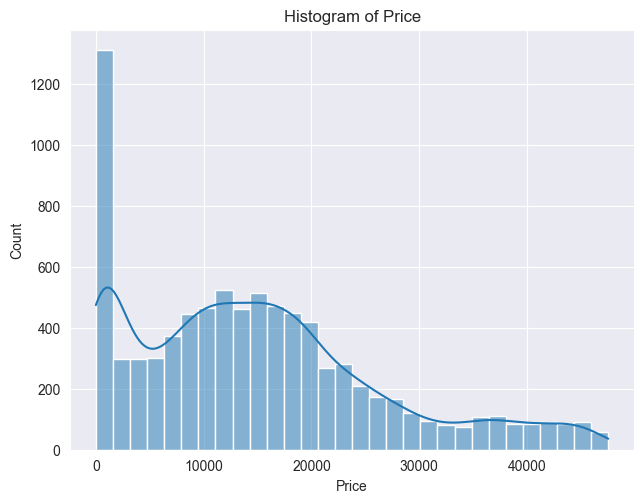

In [17]:
# Гистограмма количества автомобилей по типу привода
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 2)
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Histogram of Price')

In [18]:
# Преобразование столбца 'Mileage' в числовой формат
data['Mileage'] = data['Mileage'].str.replace('km', '')
data['Mileage'] = data['Mileage'].astype(int)
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15392\943446468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mileage'] = data['Mileage'].str.replace('km', '')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15392\943446468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mileage'] = data['Mileage'].astype(int)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,04-May,Left wheel,White,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,45755978,13328,640,FORD,Fusion,2013,Sedan,Yes,Hybrid,2,91000,4.0,Automatic,Front,04-May,Left wheel,White,8
14992,45804846,37125,765,HYUNDAI,Tucson,2015,Jeep,Yes,Diesel,2,111589,4.0,Automatic,Front,04-May,Left wheel,Silver,4
14995,45767457,1254,639,AUDI,A4,2014,Sedan,Yes,Petrol,2,42395,4.0,Automatic,4x4,04-May,Left wheel,Grey,0
14997,45761510,10349,658,OPEL,Corsa,2009,Hatchback,No,Diesel,1.3 Turbo,181179,4.0,Manual,Front,04-May,Left wheel,Black,10


In [19]:
# Кодирование категориальных переменных
from sklearn.preprocessing import OrdinalEncoder
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(data[categorical_columns])
data[categorical_columns] = encoded_data.astype(int)

data.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15392\725948341.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_columns] = encoded_data.astype(int)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,0,15,262,2006,3,0,4,12,200000,4.0,3,1,1,1,1,2
3,45769185,3607,285,12,254,2011,4,1,2,35,168966,4.0,0,0,1,0,14,0
4,45809263,11726,162,15,262,2014,3,1,4,12,91901,4.0,0,1,1,0,12,4
5,45802912,39493,296,16,496,2016,4,1,1,26,160931,4.0,0,1,1,0,14,4
6,45656768,1803,258,41,457,2010,3,1,2,22,258909,4.0,0,1,1,0,14,12


##### Визуализация распределения всех признаков

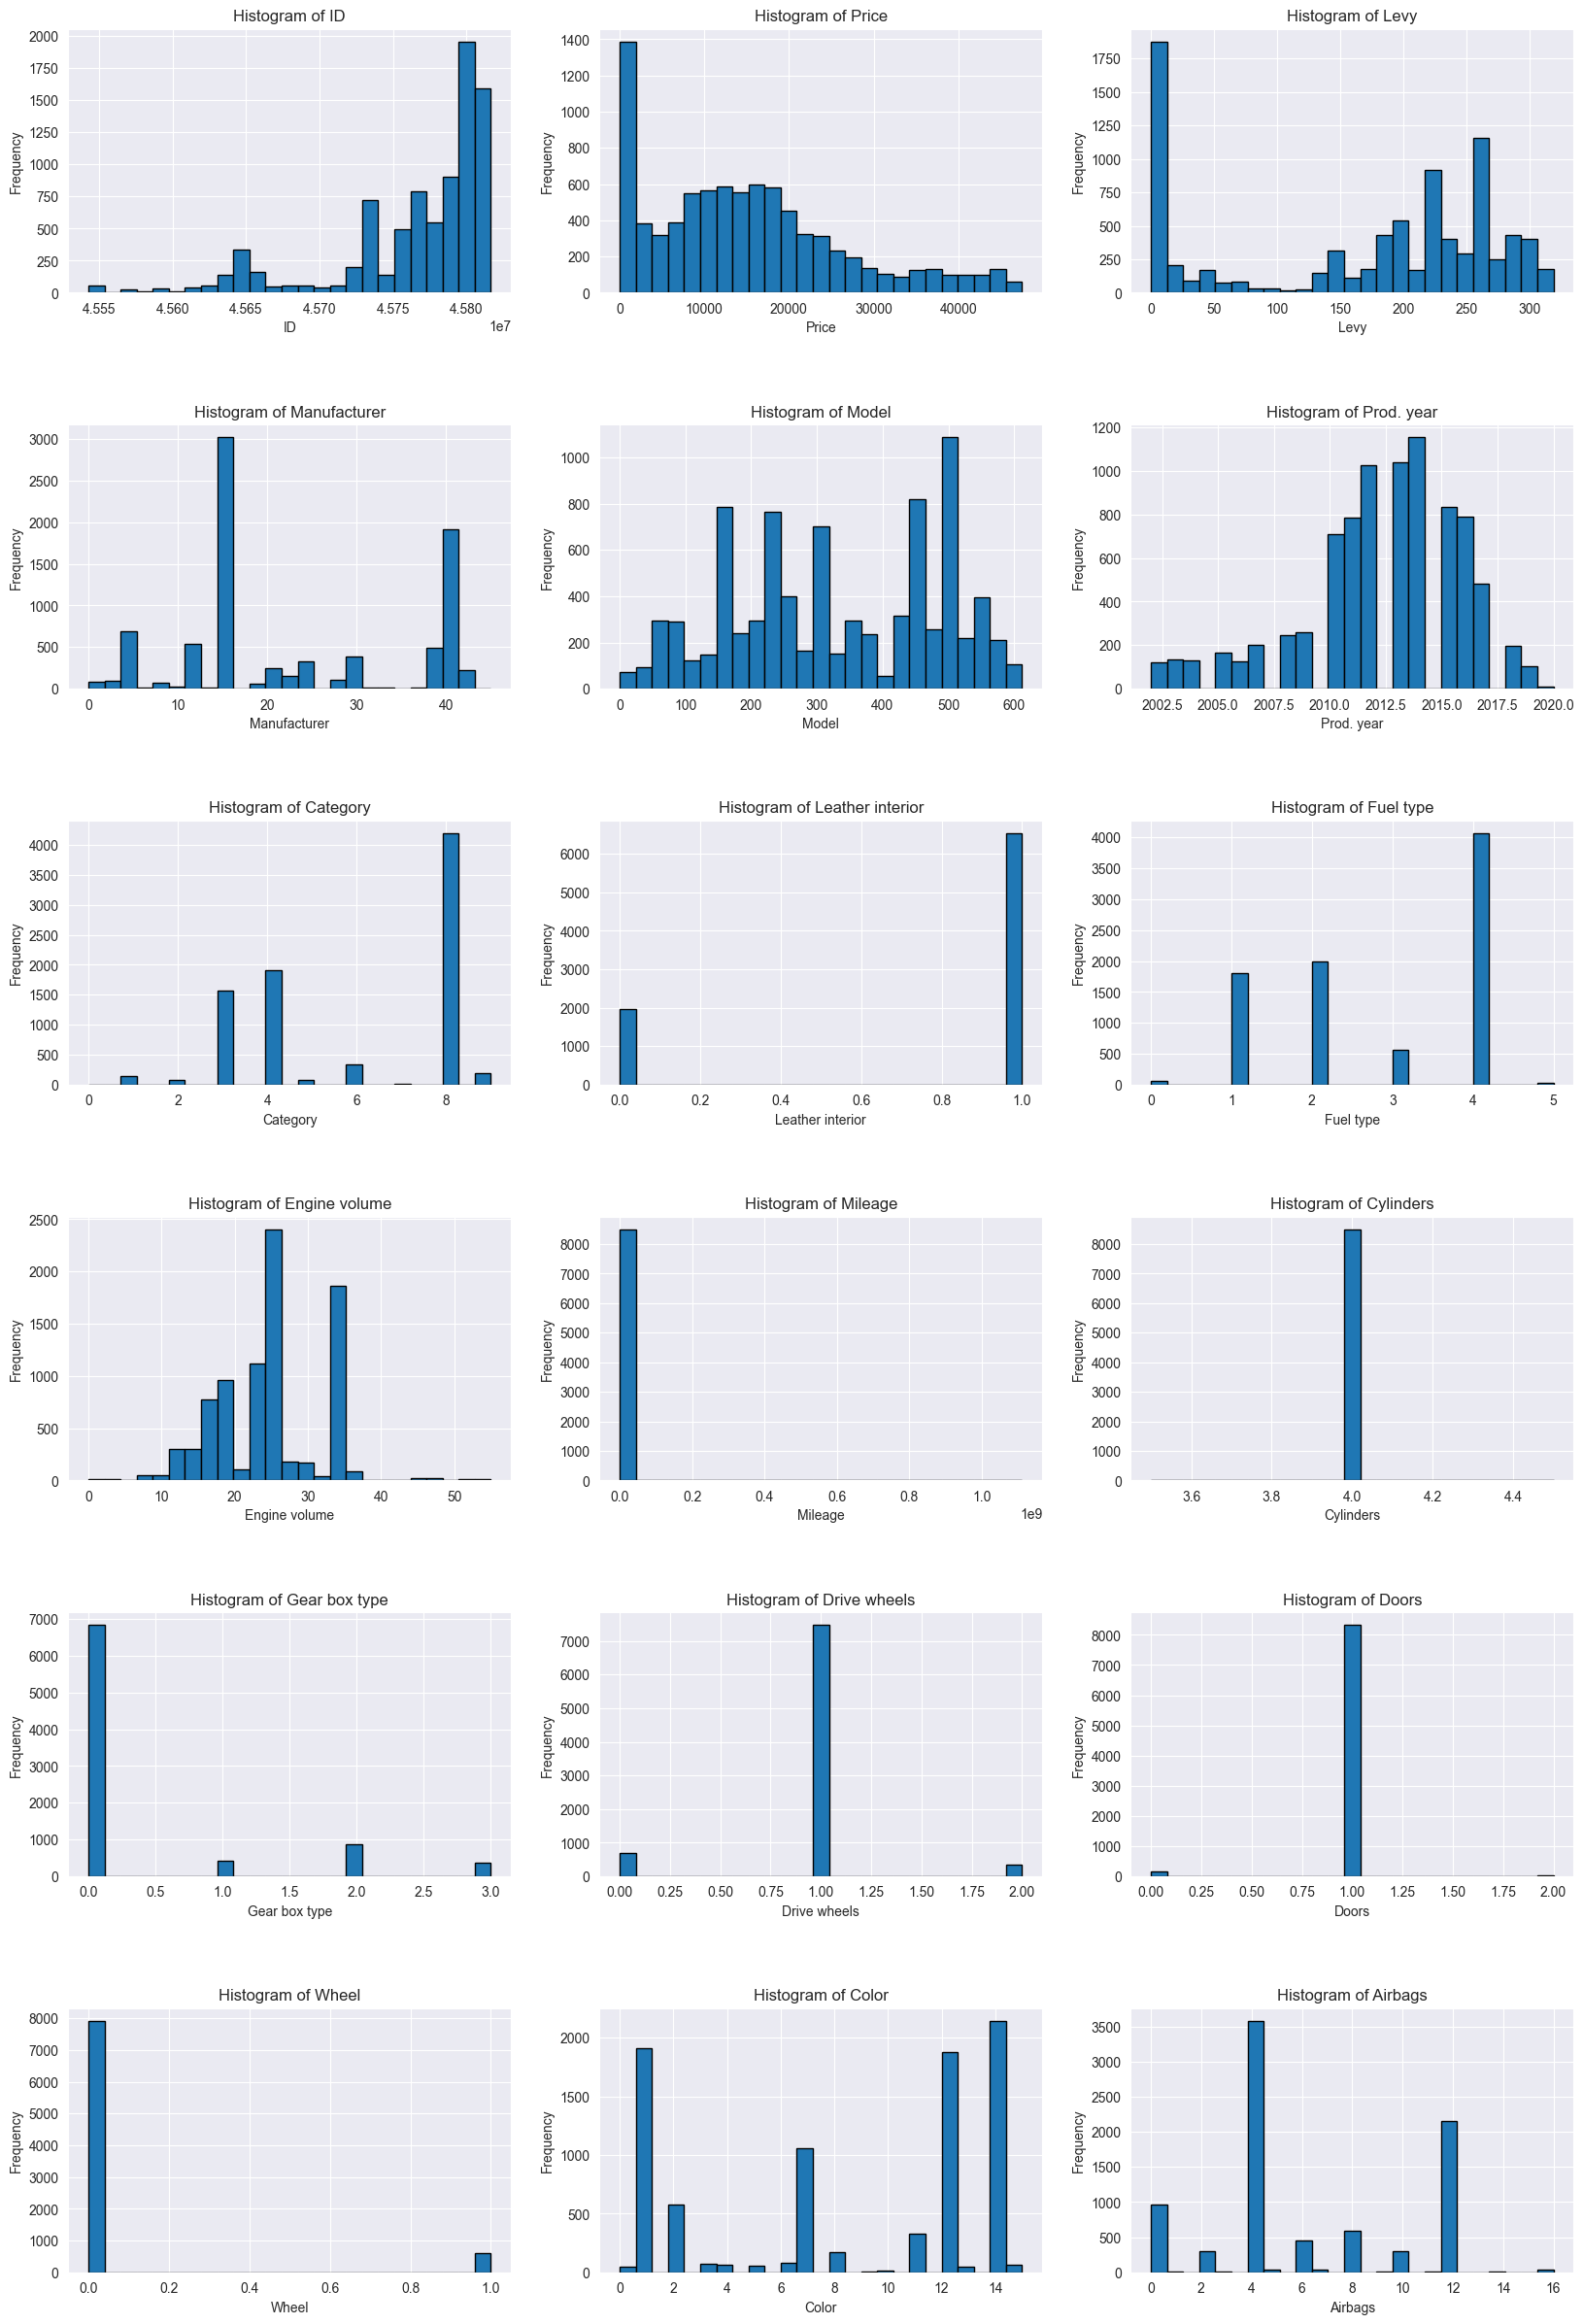

In [20]:
all_columns = data.columns

num_cols = len(all_columns)
num_rows = (num_cols - 1) // 3 + 1  

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)  

axes = axes.flatten()

for i, column in enumerate(all_columns):
    axes[i].hist(data[column], bins=25, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.show()

In [21]:
correlation_matrix = data.corr()
correlation_matrix

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,1.000000,0.130730,-0.011980,-0.214477,0.040563,-0.031814,-0.044542,0.045673,0.058019,-0.057935,-0.008561,NaN,-0.049099,0.061959,-0.025482,0.004665,0.021129,-0.061083
Price,0.130730,1.000000,0.047374,-0.067203,0.065040,0.257721,-0.096697,0.042888,-0.220674,0.104306,-0.017432,NaN,0.068345,0.059352,0.012674,-0.146578,0.032291,-0.183128
Levy,-0.011980,0.047374,1.000000,-0.121320,0.046804,0.356552,0.097606,0.413950,-0.058141,0.081069,-0.023776,NaN,-0.300103,0.007880,0.111174,-0.388383,0.037588,-0.001053
Manufacturer,-0.214477,-0.067203,-0.121320,1.000000,-0.033758,-0.085697,-0.099077,-0.185440,-0.069039,0.091729,0.015013,NaN,0.122400,-0.075356,0.033600,0.089995,0.008630,0.269500
Model,0.040563,0.065040,0.046804,-0.033758,1.000000,-0.062667,-0.135947,-0.027152,-0.181774,0.003299,0.011953,NaN,-0.026110,-0.058233,0.018635,-0.025833,0.079113,-0.160657
Prod. year,-0.031814,0.257721,0.356552,-0.085697,-0.062667,1.000000,0.182958,0.395027,0.060795,0.107772,-0.014366,NaN,-0.224173,0.012406,0.087265,-0.411102,-0.048769,0.189604
Category,-0.044542,-0.096697,0.097606,-0.099077,-0.135947,0.182958,1.000000,0.145118,0.192131,0.236461,-0.018838,NaN,-0.034574,0.114632,0.162025,-0.155119,-0.035022,0.151345
Leather interior,0.045673,0.042888,0.413950,-0.185440,-0.027152,0.395027,0.145118,1.000000,-0.073515,0.202158,-0.028434,NaN,-0.387755,0.039219,0.073865,-0.392227,-0.018581,0.031572
Fuel type,0.058019,-0.220674,-0.058141,-0.069039,-0.181774,0.060795,0.192131,-0.073515,1.000000,-0.146290,-0.021445,NaN,0.102014,-0.117651,-0.025263,0.098972,-0.112155,0.166917
Engine volume,-0.057935,0.104306,0.081069,0.091729,0.003299,0.107772,0.236461,0.202158,-0.146290,1.000000,-0.011190,NaN,-0.076764,-0.053224,0.046148,-0.243595,-0.037463,0.175308


##### Тепловая карта корреляции

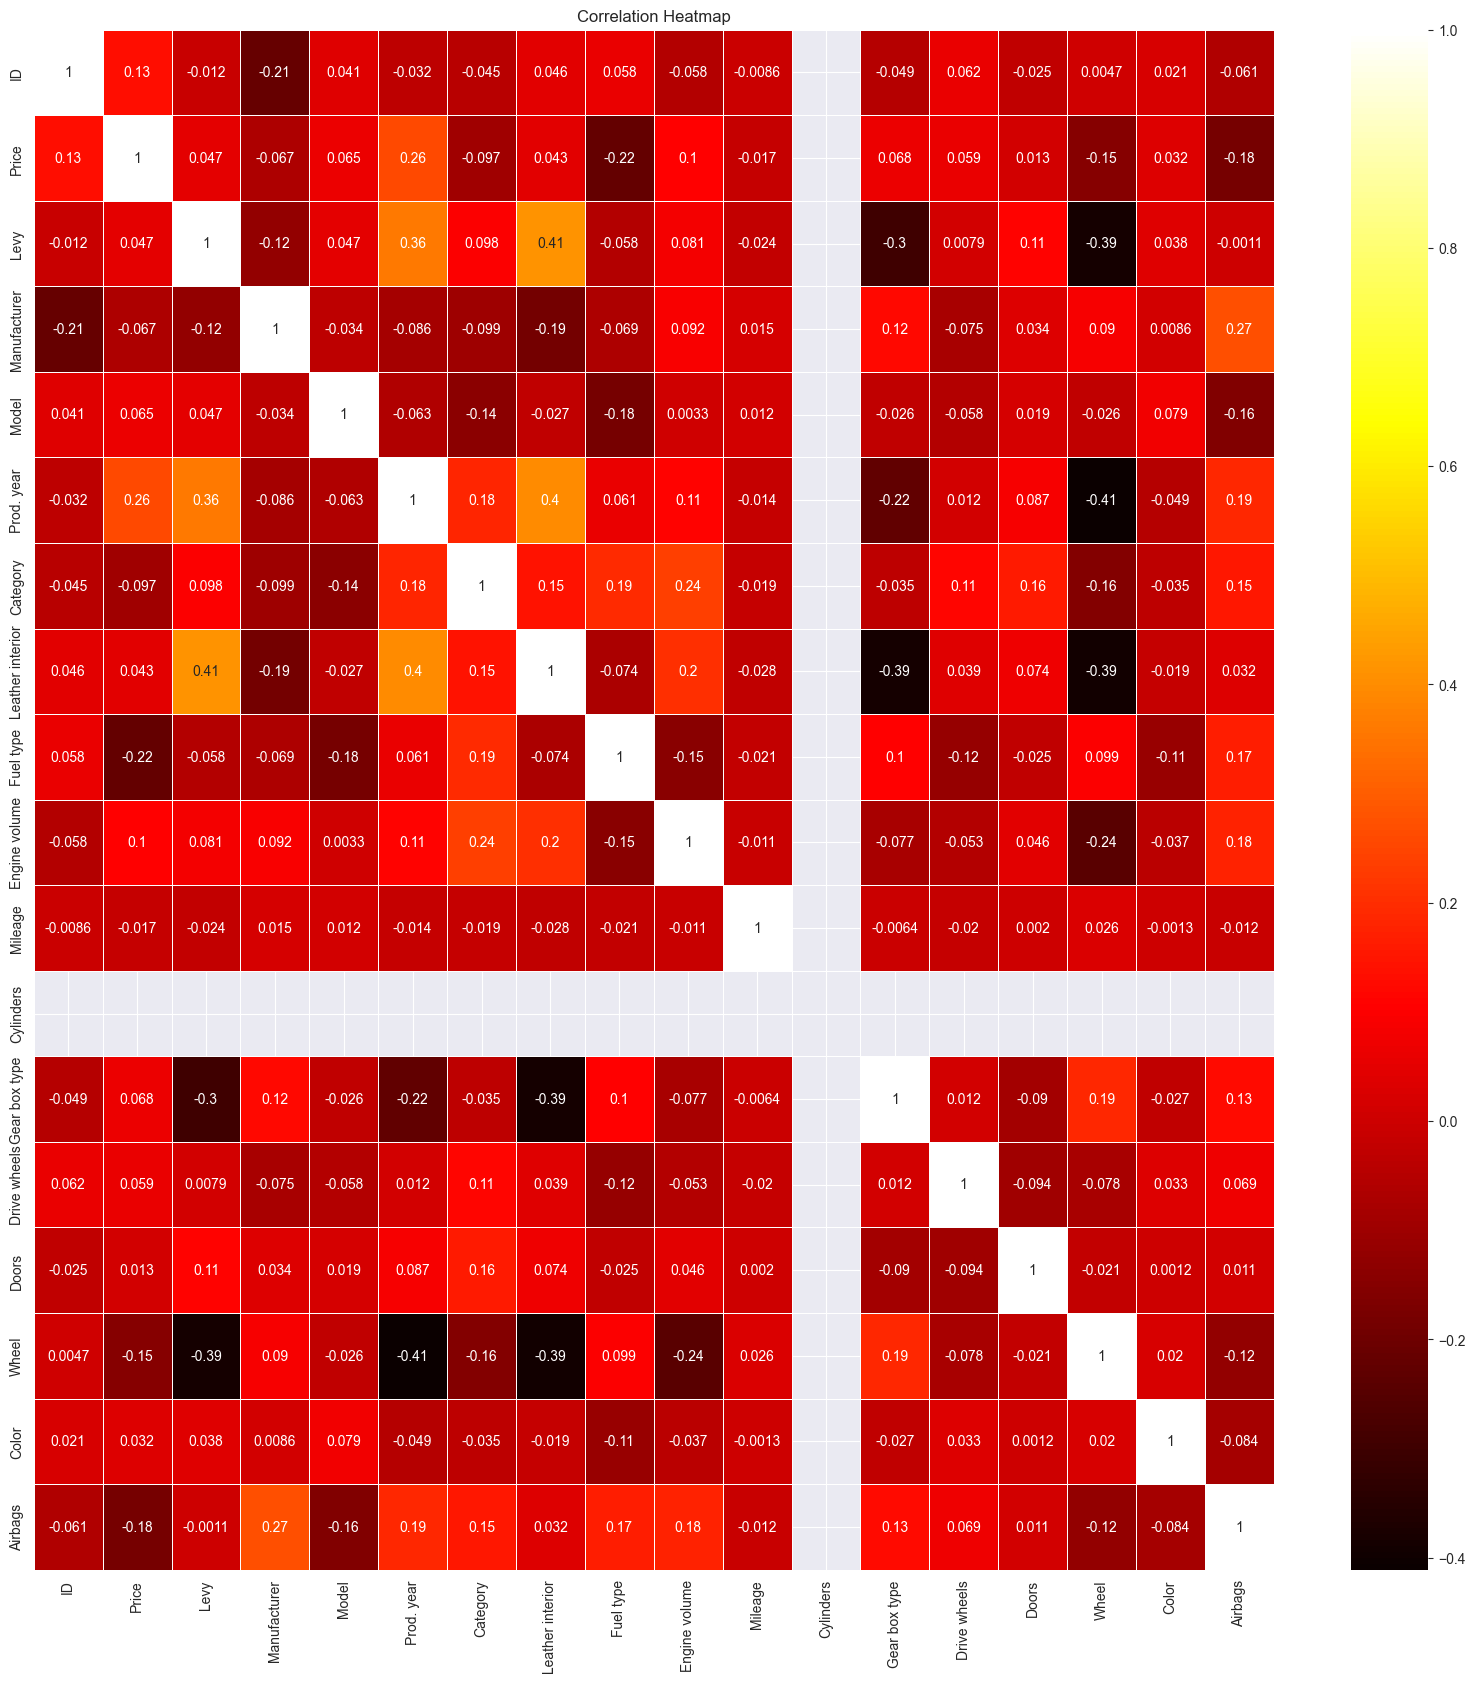

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot= True, linewidths= 0.5,cmap='hot')
plt.title('Correlation Heatmap')
plt.show()

##### Корреляция целевой переменной с остальными признаками

In [23]:
price_correlations = correlation_matrix['Price'].drop('Price')
price_correlations_without_nan = price_correlations.dropna()
print("Correlations with Price (after dropping NaNs):")
print(price_correlations_without_nan)

Correlations with Price (after dropping NaNs):
ID                  0.130730
Levy                0.047374
Manufacturer       -0.067203
Model               0.065040
Prod. year          0.257721
Category           -0.096697
Leather interior    0.042888
Fuel type          -0.220674
Engine volume       0.104306
Mileage            -0.017432
Gear box type       0.068345
Drive wheels        0.059352
Doors               0.012674
Wheel              -0.146578
Color               0.032291
Airbags            -0.183128
Name: Price, dtype: float64


##### Разделение данных на обучающий и тестовый наборы

In [24]:
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,0,15,262,2006,3,0,4,12,200000,4.0,3,1,1,1,1,2
3,45769185,285,12,254,2011,4,1,2,35,168966,4.0,0,0,1,0,14,0
4,45809263,162,15,262,2014,3,1,4,12,91901,4.0,0,1,1,0,12,4
5,45802912,296,16,496,2016,4,1,1,26,160931,4.0,0,1,1,0,14,4
6,45656768,258,41,457,2010,3,1,2,22,258909,4.0,0,1,1,0,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,45755978,218,12,295,2013,8,1,2,26,91000,4.0,0,1,1,0,14,8
14992,45804846,260,16,554,2015,4,1,1,26,111589,4.0,0,1,1,0,12,4
14995,45767457,217,1,58,2014,8,1,4,26,42395,4.0,0,0,1,0,7,0
14997,45761510,225,30,197,2009,3,0,1,13,181179,4.0,1,1,1,0,1,10


In [26]:
y

2         8467
3         3607
4        11726
5        39493
6         1803
         ...  
14989    13328
14992    37125
14995     1254
14997    10349
14998    23703
Name: Price, Length: 8507, dtype: int64

In [27]:
X_train.shape

(6805, 17)

In [28]:
X_test.shape

(1702, 17)

In [29]:
y_train.shape

(6805,)

In [30]:
y_test.shape

(1702,)

##### Построение и обучение моделей машинного обучения

In [31]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
]

##### Прогнозирование и оценка моделей

In [32]:
predictions = []
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((model_name, y_pred))
    
for model_name, y_pred in predictions:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R^2 Score: {r2:.2f}')
    print('--------------------------')

Model: Linear Regression
Mean Squared Error: 99896153.63
R^2 Score: 0.25
--------------------------
Model: Decision Tree
Mean Squared Error: 44829385.51
R^2 Score: 0.66
--------------------------
Model: Random Forest
Mean Squared Error: 26791473.90
R^2 Score: 0.80
--------------------------


##### Визуализация фактических и предсказанных цен для каждой модели

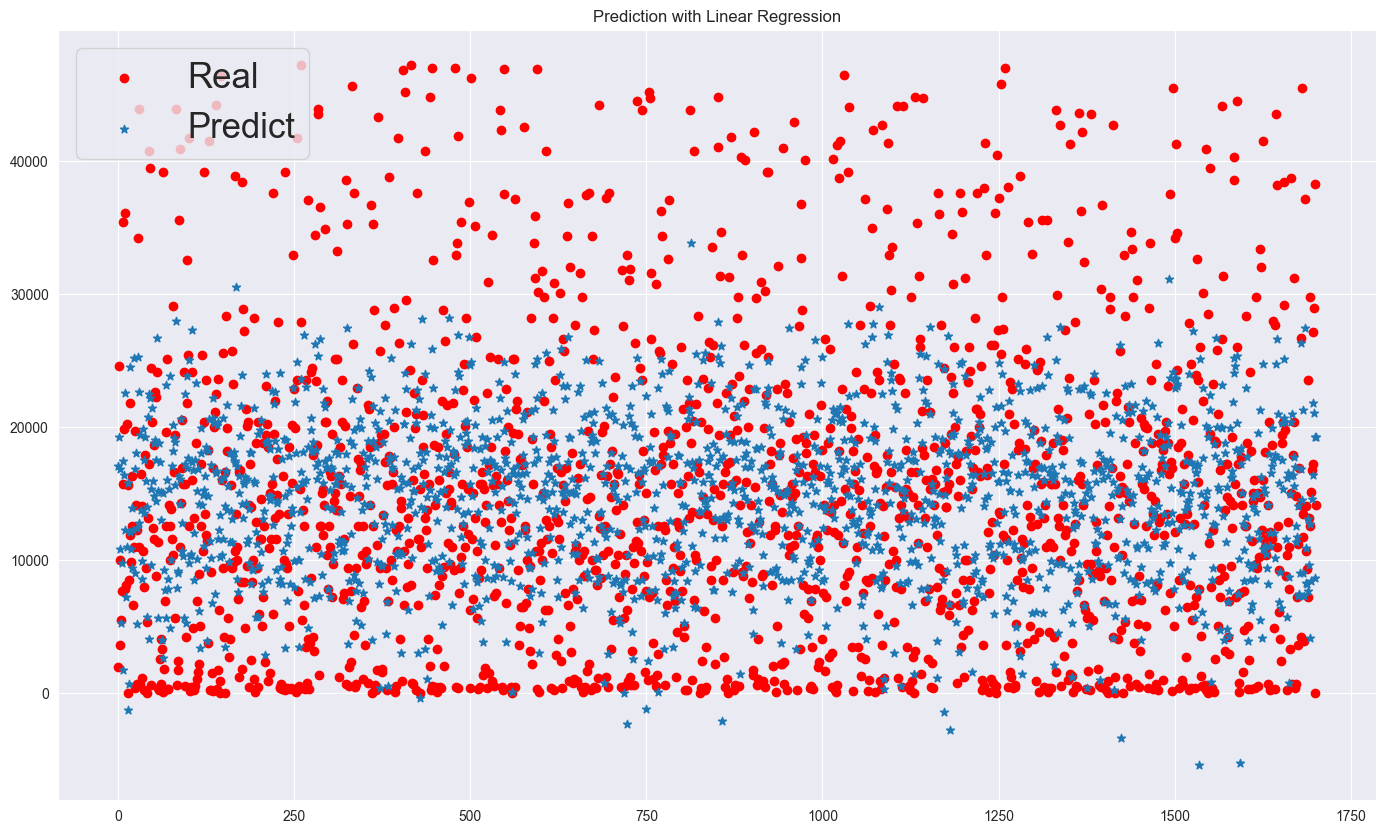

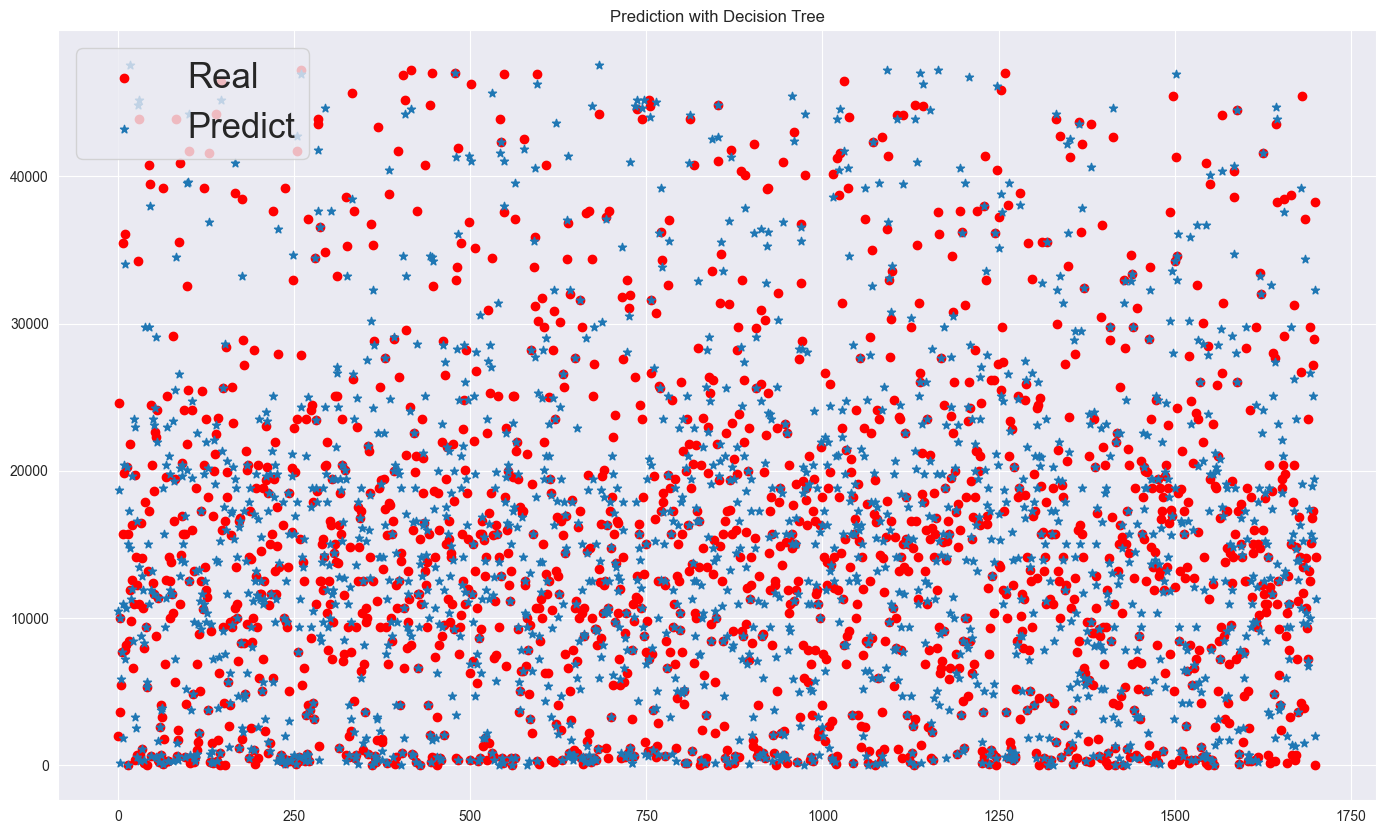

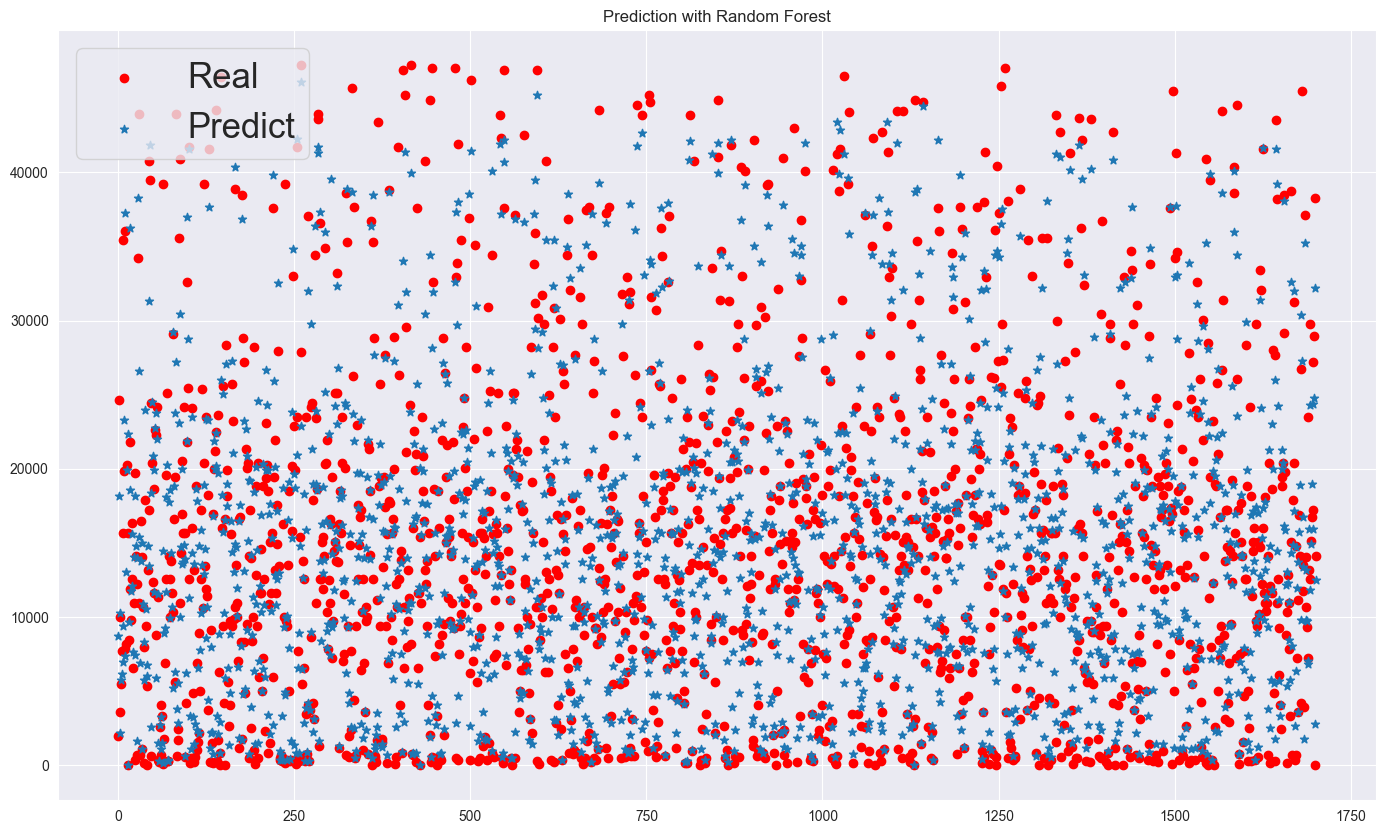

In [33]:
for model_name, y_pred in predictions:
    fig = plt.figure(figsize=(17, 10))
    plt.title(f"Prediction with {model_name}")
    plt.scatter(range(X_test.shape[0]), y_test, color='red', label='Real')
    plt.scatter(range(X_test.shape[0]), y_pred, marker='*', label='Predict')
    plt.legend(loc=2, prop={'size': 25})
    plt.show()